In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [8]:
create_time = pd.read_csv("../results_03_01/FAST_KNN_NO_ObjIndex_search_sub_timeline_2500000_100000.csv", names=['obj_search', 'insert']).reset_index()
create_time['name'] = 'fast'
create_time['obj_search'] = create_time['obj_search'] / 1000000
create_time['insert'] = create_time['insert'] / 1000000
create_time = create_time.melt(id_vars=['index', 'name'], var_name='stage', value_name='time')

create_time

,index,name,stage,time
0,0,fast,obj_search,9.257749
1,1,fast,obj_search,6.433882
2,2,fast,obj_search,0.219031
3,3,fast,obj_search,0.175755
4,4,fast,obj_search,0.407020
...,...,...,...,...
4999995,2499995,fast,insert,0.003496
4999996,2499996,fast,insert,0.001462
4999997,2499997,fast,insert,0.003996
4999998,2499998,fast,insert,0.002028


## Creation time

(0.0, 10.0)

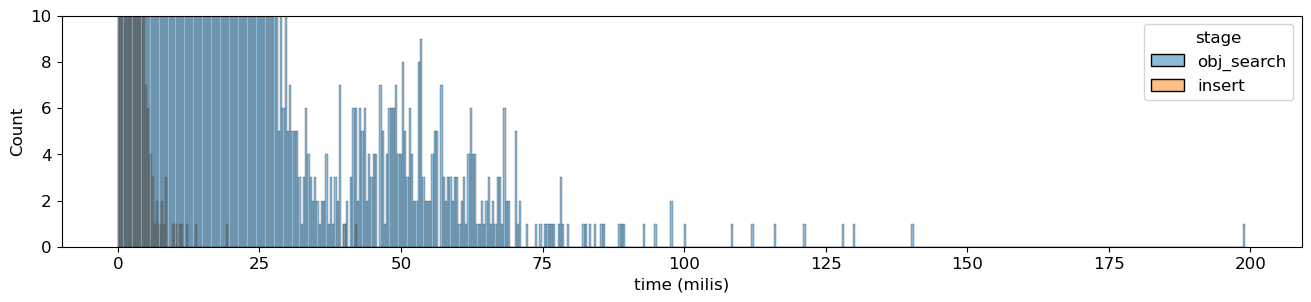

In [9]:
plt.figure(figsize=(16,3))
sns.histplot(x='time', bins=500, hue='stage', multiple='layer', data=create_time)
plt.xlabel('time (milis)')
plt.ylim(0, 10)

**Miserable queries**

Queries that takes too much time (>100 milis). 

In [10]:
miserable_queries = create_time[create_time['time'] > 50].sort_values('time', ascending=False)
miserable_queries

,index,name,stage,time
2294335,2294335,fast,obj_search,199.087662
2146534,2146534,fast,obj_search,140.189837
2113780,2113780,fast,obj_search,129.927067
624299,624299,fast,obj_search,128.135970
718693,718693,fast,obj_search,121.412311
...,...,...,...,...
872108,872108,fast,obj_search,50.485918
2388092,2388092,fast,obj_search,50.384827
980051,980051,fast,obj_search,50.342808
288319,288319,fast,obj_search,50.214662


Text(0, 0.5, 'time (milis)')

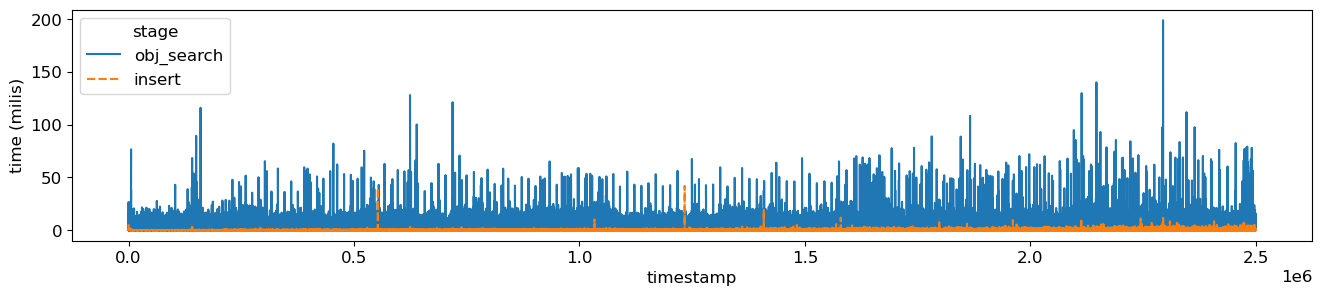

In [12]:
# step = 500000
# for i in range(0, 2500000, step):
plt.figure(figsize=(16,3))
sns.lineplot(x='index', y='time', hue='stage', style='stage', data=create_time)
plt.xlabel('timestamp')
plt.ylabel('time (milis)')

Relative time (FAST vs CkQST)

In [25]:
# relative_create = create_time[create_time['stage'] == 'insert']['time'].reset_index() - create_time[create_time['stage'] == 'obj_search']['time'].reset_index()
# relative_create
# plt.figure(figsize=(16,8))
# sns.lineplot(data=relative_create)
# plt.xlabel('timestamp')
# plt.ylabel('time (milis)')

## Load Queries

In [14]:
queries_df = pd.read_csv('../data/Places_Queries_2500000.csv');

queries_df.tail()

,id,x,y,keywords,k,ar,current_level,st,et
2499995,2499995,260.643938,110.297883,contractor,5,0.195442,9,2499995,2800001
2499996,2499996,278.661373,197.628919,used,5,3.854567,9,2499996,2800001
2499997,2499997,260.217315,69.398765,carpet|cleaners|rug,5,4.791082,9,2499997,2800001
2499998,2499998,167.413845,140.794951,regional,5,53.612263,9,2499998,2800001
2499999,2499999,256.967070,86.626912,church,5,0.874051,9,2499999,2800001


### Properties of miserable queries

In [26]:
queries_df.shape

(2500000, 9)

In [27]:
details = queries_df.join(miserable_queries.set_index('index'), on='id').dropna().sort_values('time', ascending=False)
# details = details[details['name'] == 'fast']
details['ar'] = details['ar'].apply(lambda x: np.inf if x > 512 else x)
all = details.drop(columns=['current_level', 'id', 'k', 'st', 'et']).rename(columns={'time': 'insertion time (milis)'})

In [34]:
obj_search = all[all['stage'] == 'obj_search']
insert = all[all['stage'] == 'insert']

insert#.join(ckqsts, rsuffix='_')
obj_search.head(25)

,x,y,keywords,ar,name,stage,insertion time (milis)
2294335,136.849719,178.148712,business|mfg|repair,inf,fast,obj_search,199.087662
2146534,228.444134,164.866156,contractor|trenching|underground,40.664331,fast,obj_search,140.189837
2113780,246.894490,201.938389,aircraft|equipment|parts|supply,112.695067,fast,obj_search,129.927067
624299,22.047688,28.542137,contractor|family|general|new,inf,fast,obj_search,128.135970
718693,137.446783,185.204339,local|storage|trucking|without,40.984215,fast,obj_search,121.412311
159794,136.793966,188.615945,church,1.985118,fast,obj_search,116.109171
2346308,241.147865,222.392531,dealer|religious|store,inf,fast,obj_search,111.902076
1866329,241.399982,138.923338,contractor|general|road,inf,fast,obj_search,108.393837
639138,258.417080,92.889464,contractor|equipment|installation|station,inf,fast,obj_search,100.203108
2364369,248.848688,132.783435,organization|religious,14.717663,fast,obj_search,97.756249
